# Multi-class classification with a CNN

To demonstrate the power of CNNs, we are going to download the [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist) dataset directly via TensorFlow again. Just as in our previous notebook, you can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2025-03-31 14:13:19.481225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-31 14:13:19.481319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-31 14:13:19.482135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 14:13:19.488373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check the shapes of the data.

In [2]:
# Check the shape of your data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Look at the shape of a single example
train_data[0].shape

(28, 28)

You should have discovered 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

Now, plot some random images from the dataset.

(<matplotlib.image.AxesImage at 0x7fd35fd49e10>, 39067)

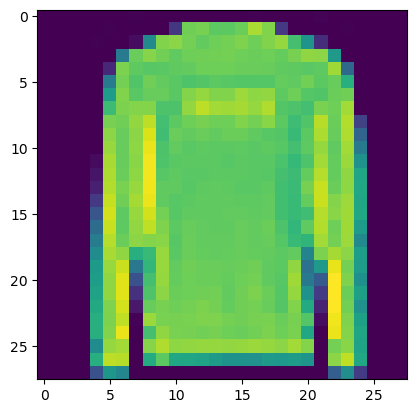

In [4]:
# Plot a random example
random_image_number = np.random.randint(0, 59999)
plt.imshow(train_data[random_image_number]), random_image_number

What about its label?

In [5]:
# Check the random sample's label
train_labels[random_image_number]

2

The labels seem to be in numerical form. This is fine for a neural network, however, we would like some text labels.

Let's create a list of the class names (you can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Determine the output shape.

In [7]:
# How many classes are there?
len(class_names)

10

Create a first model, which you think should be up to the classification job. Train for 10 epochs.

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model

CNN_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model
CNN_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = CNN_model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10


2025-03-31 14:13:22.486989: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1022 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-03-31 14:13:23.205860: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-03-31 14:13:24.399773: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd14f3b9f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-31 14:13:24.399848: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-03-31 14:13:24.405514: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743423204.515165 2634709 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at mos

1875/1875 [==============================] - 7s 2ms/step - loss: 0.5067 - accuracy: 0.8469 - val_loss: 0.3242 - val_accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.8904 - val_loss: 0.3142 - val_accuracy: 0.8830
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9027 - val_loss: 0.3030 - val_accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9112 - val_loss: 0.2789 - val_accuracy: 0.9007
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2239 - accuracy: 0.9152 - val_loss: 0.3080 - val_accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2075 - accuracy: 0.9227 - val_loss: 0.2764 - val_accuracy: 0.9049
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1954 - accuracy: 0.9273 - val_loss: 0.2995 - val_accuracy: 0.9044
Epo

Have a look at the model summary

In [9]:
CNN_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

Does our model improve, if we pass it normalized data? First normalize the data and then refit the model.

In [10]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [11]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model

CNN_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model
CNN_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_2 = CNN_model_2.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4132 - accuracy: 0.8513 - val_loss: 0.3214 - val_accuracy: 0.8860
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.8996 - val_loss: 0.3310 - val_accuracy: 0.8793
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9152 - val_loss: 0.2519 - val_accuracy: 0.9059
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2023 - accuracy: 0.9239 - val_loss: 0.2354 - val_accuracy: 0.9125
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1772 - accuracy: 0.9335 - val_loss: 0.2416 - val_accuracy: 0.9153
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1579 - accuracy: 0.9401 - val_loss: 0.2508 - val_accuracy: 0.9107
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1412 - accuracy: 0.9475 - val_loss: 0.2321 - val_accuracy:

Indeed, there is an improvement!

Now, create at least two more variations of the CNN above. I.e. try different hyperparameters, or leave entire layers away (e.g. drop out layer).

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model

CNN_model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (2,2), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model
CNN_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_3 = CNN_model_3.fit(train_data,
                                train_labels,
                                epochs=5,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4855 - accuracy: 0.8231 - val_loss: 0.3559 - val_accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3226 - accuracy: 0.8828 - val_loss: 0.3640 - val_accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8968 - val_loss: 0.2929 - val_accuracy: 0.8924
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9068 - val_loss: 0.2576 - val_accuracy: 0.9074
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9152 - val_loss: 0.2592 - val_accuracy: 0.9061


In [14]:
CNN_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         32896     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model

CNN_model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model
CNN_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_4 = CNN_model_4.fit(train_data,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5503 - accuracy: 0.7978 - val_loss: 0.3697 - val_accuracy: 0.8693
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8652 - val_loss: 0.3445 - val_accuracy: 0.8757
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8817 - val_loss: 0.2909 - val_accuracy: 0.8919
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8916 - val_loss: 0.2648 - val_accuracy: 0.9034
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2767 - accuracy: 0.8982 - val_loss: 0.2612 - val_accuracy: 0.9048
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2623 - accuracy: 0.9028 - val_loss: 0.2510 - val_accuracy: 0.9098
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9072 - val_loss: 0.2383 - val_accuracy: